In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


#Grab data and put numerical vals in one table
#################################################################################################################
dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
#print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
#print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]



#Get Rid of Outliers
#################################################################################################################

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]



print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


#################################################################################################################

encoded_df = cleaned_df.copy()

encoded_df['Gender'] = encoded_df['Gender'].map({
    'Male': 1,
    'Female': 0
})

workout_dummies = pd.get_dummies(encoded_df['Workout_Type'], prefix='Workout', drop_first=True)
encoded_df = pd.concat([encoded_df.drop(columns=['Workout_Type']), workout_dummies], axis=1)




Original rows: 973
Cleaned rows: 931
Rows removed: 42


Splitting a dataset for machine learning models comes in as a crucial step in the version impovement process.<br>
There are a few different ways in which a dataset can be split to be readied for machine learning<br><br>

1. Train-Test Split<br>
In this case the dataset would be divided into a training set (educating set) and a trying out set. The educating set is used to educate (or train) the model. The trying out set is used to test the model/assess the model's overall performance. Normally, 70 to 80 % of the dataset is used for training while the remaining of 20 to 30 % is used to assess the capabilites of the model. These precentages may vary, depending on the size of the dataset.<br><br>

2. Train-Validation-Test Split<br>
In this case the dataset is divided into 3 subsets. A schooling set, a validation set, and a trying out set. The training set is used to train the model. The validation set is used to tune hyperparameteres and validate the performance of the overall model. The testing set is used to evaluate the very last version of the model for its performance.<br><br>

3. K-fold Cross Validation<br>
The dataset is divided into k folds and the model is trained and validated over the k instances. Each time, a fold is used for training and another one is used for validating purposes. This can produce greater overall performance, estimates, and reduces the variance in version evaluation.<br><br>

4. Stratified Sampling<br>
In this case the distribution of the training and otger features of the model is retained in the training and testing phases. This type of split is good when dealing with unbalanced datasets or a small amount of samples.<br><br>

5. Time-primarily used split<br>
This tipe of split is used when using time collection facts, which can consists of things such as stock costs or weather statistics. The dataset gets cut regurarly into training and testing dataset based on a chronological order. This enables us to see how the model performs on future unseen facts.<br><br>

https://www.geeksforgeeks.org/machine-learning/splitting-data-for-machine-learning-models/



There is no specific rule as to how all datasets should be split.  With that being said - the split of the dataset can depend on the size of the original dataset, or the number of predictors in a predictive model. <br><br>

Organizations and data modellers can chose to split the dataset based on data sampling methods. These methods can be but are not limited to:<br><br>

1. Random sampling<br>
In this case the data modeling process is protected against bias towards the different characteristic of the dataset. This method can present itself with issues such as uneven distribution of data.<br><br>

2. Stratified random sampling<br>
In this case, data samples are selected at random within specific parameters - ensuring that the data is correctly distributed in training and test sets.<br><br>

3. Nonrandom sampling<br><br>
This method can be used when the modeller wants the most recent data as the test set.<br><br>

Common data splitting uses include:<br><br>

- Data Modelling -> meaning when the split data will be used to train models -> Statistical Modelling splits data to validate assumptions<br><br>

- Machine Learning -> also using data splitting to train models -> Machine Learning splits data to validate predictive performance<br><br>

- Cryptographic splitting -> process used to secure data over a computer network<br><br>

In Machine Learning data splitting is normally used to avoid overfitting (in certain cases, Machine Learning models can fit their training data too well and end up being unable to adjust to new parameters)<br>
The original dataset used for machine learning is normally split into 3 or 4 sets. The 3 sets are then used as a training set, a dev set, and a testing set.<br><br>

1. The Training set is the proporation of the dataset that is used to train the model. The model observes and learns from the training set, optimizing its parameters<br><br>

2. The Dev Set is a set of examples used to change learning process parameters. It can be also called the cross-validation or model validation set. This set of data can help rank the model's accuracy and can help with model selection<br><br>

3. The testing set is the proportion of data that is tested in the final model and is compared agaist the previously mentioned sets of data. This last set acts as an evaluation of the final mode and algorithm<br><br>

https://www.techtarget.com/searchenterpriseai/definition/data-splitting

In [2]:
# ============================================================
#   TRAIN/TEST SPLIT + SCALING
#   This prepares your data for any ML model
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1. Define X (features) and y (target)
# ------------------------------------------------------------
# Gender must already be encoded as 0/1 in encoded_df
X = encoded_df.drop(columns=['Gender'])
y = encoded_df['Gender']

# ------------------------------------------------------------
# 2. Train/Test Split
# ------------------------------------------------------------
# test_size=0.2 means 20% of data is held out for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 3. Scale the numeric features
# ------------------------------------------------------------
# Scaling helps models like Logistic Regression, SVM, KNN, Neural Networks
# Tree-based models (Random Forest, XGBoost) do NOT require scaling,
# but scaling does not harm them.
scaler = StandardScaler()

# Fit on training data ONLY, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Optional: Print shapes to confirm everything looks right
# ------------------------------------------------------------
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled versions created: X_train_scaled, X_test_scaled")


X_train shape: (744, 16)
X_test shape: (187, 16)
y_train shape: (744,)
y_test shape: (187,)

Scaled versions created: X_train_scaled, X_test_scaled


Support Vector Machine or SVM is a supervised machine learning algorithm used for classification and regression tasks. It tries to find the best boundary known as hyperplane that separates different classes in the data. It is useful when you want to do binary classification (examples of this include Spam VS Non Spam detection; Cat VS Dog classification). The main goal of this type of model is to maximize the margin betwene the two classes. The larger the margin, the better the model performs on new and unseen data.<br><br>

This type of model has a few key concepts, including:<br><br>

- Hyperplane -> decision boundary separating different classes in feature space and is represented by the equation WX + B = 0 in linear classification<br><br>

- Support Vectors -> the closest data points to the hyperplane, crucial for determining the hyperplane margin<br><br>

- Margin -> the distance between the hyperplane and the support vectors. SVM aims to maximize this margin for better classification performance<br><br>

- Kernel -> a function that maps data to higher-dimensional space enabling SVM to handle non-linearly separable data<br><br>

- Hard Margin -> a maximum-margin hyperplane that perfectly separates the data without missclassification<br><br>

- Soft Marhing -> allows for somt misclassification by introducing slack variables, balancing margin maximization and misclassification penalties when data is not perfectly separate<br><br>

- C -> a regularization term that balances margin maximization and misclassification penalties. A higher C values forces stricter penalty for misclassification<br><br>

- Hinge Loss -> a loss function penalizing misclassified points or margin violations and is combined with regularization in SVM<br><br>

- Dual Problem -> involves solvign for Langrange multipliers associated with support vectors, facilitating the kernel trick and efficient computation<br><br>

https://www.geeksforgeeks.org/machine-learning/support-vector-machine-algorithm/

The example used in these concepts: there are two different neighbourhoods, one has blue coloured houses and the other one has red coloured houses. The goal that the model will try to achieve is to draw a street (a line) that separates the two neighborhoods as clearly as possible.<br><br>

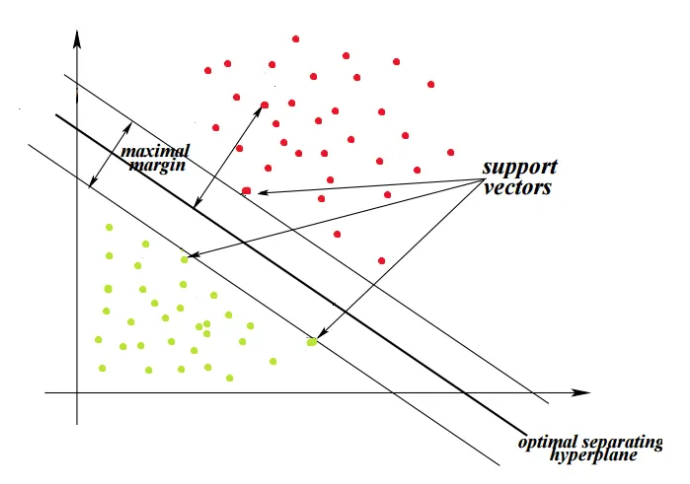
<br><br>
Key Concepts in Support Vector Machine:<br><br>

1. Street (Decision Boundary) -> decision boundary created by the model. SVM tries to find the best possible street that maximally separates the blue houses from the red houses<br><br>

2. Support Vectors -> these are the houses that are closest to the street (or boudary). These are the most important houses in trying to determine where the street lies because they play a crucial role in determining where the boudry lies<br><br>

3. Margin -> the margin is represented in our example by the distance between the street and the nearest house (Support Vector) for each neighborhood. A larger margin means that you have a more confident and robust reparation<br><br>

4. Optimal Street -> SVM wants to find the optimal street that miximizes the margin (widest possible gap between the neighborhoods)<br><br>

5. Kernel Trick (pretty smart) -> In some cases, the neighborhoods might not be easily separated by a staight line. The kernel trick (kernel function to trasform the 2D non-linear data to higher dimension) is like lifting the houses into 3D space and finding the plane that separates them. Then, project this plane back to 2D, and it might look like a non-linear boundry<br><br>

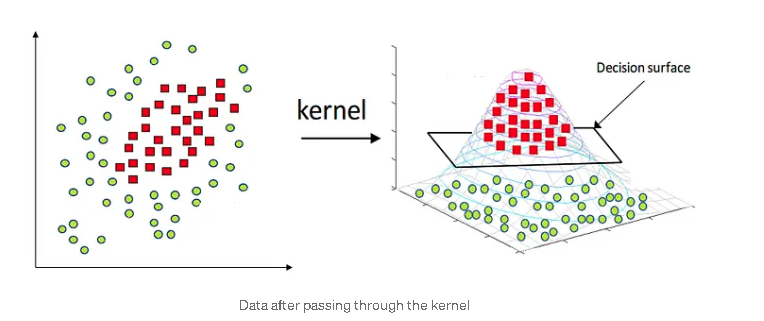
<br><br>

Different types of kernels can be used such as: <br><br>

- Polynomial kernel<br><br>

- Gaussian kernel<br><br>

- Gaussian radical basis kernel <br><br>

- Laplace RBF kernel <br><br>

The are a few assumptions that the SVM makes when predicting where this boundry lies:<br><br>

- Linear Separability -> this is the primary assumption -> which states that the data can be transformed into a linearly separable space. In other words, there exists a hyperplane that can distinctly separate the classes<br><br>

- Margin Maximization -> the model aims to find the hyperplane that maximizes the margin between classes. This assumes that a larger margin will contribute to better generalization and improved performance<br><br>

- Noisy Data Handling -> this type of model is sensitive to noisy data and outliers, as these can influence the position and orientation of the decision boudary. Outliers can have a significant impact on the resulting hyperplane <br><br>

- Kernel Function Choice -> the choice of the kernel function (linear, polynomial, radial basis function) used and its parameters can affect the performance of the model. The appropriate kernel and parameters depend on the characteristics of the data<br><br>

- Memory Efficiency -> this type of model is efficient in terms of memory usage due to the use of a subset of training points (support vectors) in decision-making. This can be an advantage in terms of memory usage but it also assumes that these support vectors are representative of the whole dataset<br><br>

Support Vector Machine Models come with their own strenghts and weaknesses. <br><br>

Strenghts include:<br><br>

- Effective in high-dimensional spaces -> this type of model performs well in high-dimensional spaces, making them suitable for tasks with a large number of features<br><br>

- Robust to Overfitting -> SVM models are less prone to overfitting, especially in high dimensional spaces, due to the use of a margin that penalizes data points inside the margin<br><br>

- Effective in Cases with Clear Margin of Separation -> this type of model works well when there is a clear margin of separation between classes, making them suitanle for tasks with distinct and well-separated classes<br><br>

- Kernel Trick for Non-Linear Data -> the kernel trick enables the SVM model to handle non-linear decision boundaries by implicitly mapping data into higher-dimensional spacse<br><br>

- Versatile Kernels -> SVM models support different kernel functions, providing flexibility in capturing different types of relationships in the data<br><br>

- Memory Efficiency -> these types of models use a subset of training points (the support vectors) in decision making, making them memory-efficient, especially when dealing with large datasets<br><br>

Weaknesses include:<br><br>

- Sensitivity to Noice and Outliers -> these types of models are very sensitive to noise and outliers, as they may influence the position and orientation of the decision boundary<br><br>

- Difficulty in Handling Large Datasets -> SVM models can become computationally expensive and memory intensive, particularly with large datasets<br><br>

- Choice of Kernels and Parameters -> the choice of the appropriate kernel and tuning of hyperparameters can be challanging, and the performance may be sensitive to these choices<br><br>

- Limited Interpretability -> the decision function of SVM is not easily interpretable, making it challanging to understand the contribution of each feature in the final decision the model makes<br><br>

- Not Suitable for Imbalanced Datasets -> SVM may not perform well on highly impalanced datasets where one class significantlly outnumbers the other<br><br>

- Binary Classification -> SVM are inherently binary classifiers, and extensions to handle multiclass problems may require strategies like one-vs-one or one-vs-all

https://medium.com/@bhagyashrilakhadive/introduction-to-support-vector-machine-svm-4946083b8052

add about kernels?

In [4]:
# ============================================================
# SUPPORT VECTOR MACHINE (SVM)
# Excellent for binary classification. Works best with scaling.
# Look for high accuracy and strong separation between classes.
# ============================================================

from sklearn.svm import SVC

svm_model = SVC(probability=True)  # probability=True needed for ROC curves
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9572192513368984


Accuracy: 0.9572

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        94
           1       0.95      0.97      0.96        93

    accuracy                           0.96       187
   macro avg       0.96      0.96      0.96       187
weighted avg       0.96      0.96      0.96       187



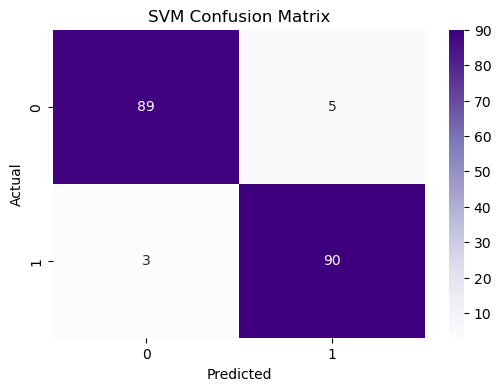

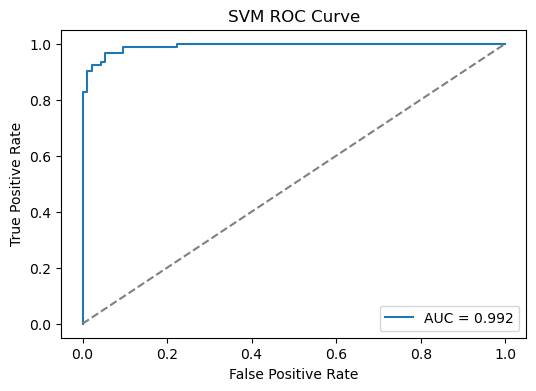

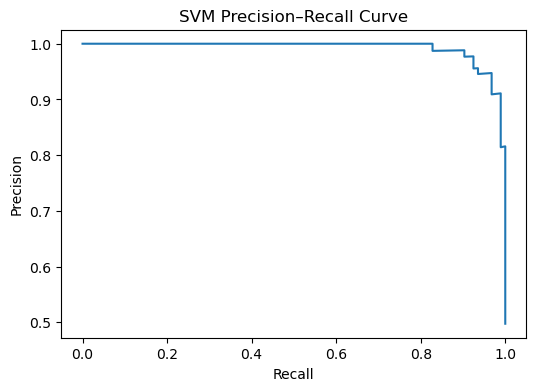


Number of Support Vectors: 260
Support Vectors per Class: [126 134]


In [14]:
# ============================================================
#   SUPPORT VECTOR MACHINE (SVM) — FULL MODEL EVALUATION
#   This cell trains the SVM model and evaluates it using:
#     ✔ Accuracy
#     ✔ Classification Report
#     ✔ Confusion Matrix
#     ✔ ROC Curve + AUC
#     ✔ Precision–Recall Curve
#     ✔ Support Vectors (unique to SVM)
#   Every section includes comments explaining what to look for.
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import pandas as pd

# ------------------------------------------------------------
# 1. Train the SVM model
# ------------------------------------------------------------
# SVM works best with scaled data.
# probability=True allows us to compute ROC and PR curves.
svm_model = SVC(probability=True, kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


# ------------------------------------------------------------
# 2. Accuracy Score
# ------------------------------------------------------------
# Accuracy = proportion of correct predictions.
# SVM often performs very well on binary classification.
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")


# ------------------------------------------------------------
# 3. Classification Report
# ------------------------------------------------------------
# Shows precision, recall, and F1-score for each class.
# Look for balanced values across both classes.
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


# ------------------------------------------------------------
# 4. Confusion Matrix
# ------------------------------------------------------------
# Shows EXACTLY where the model is making mistakes.
# Diagonal = correct predictions.
# Off-diagonal = errors.
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------------------------
# 5. ROC Curve + AUC Score
# ------------------------------------------------------------
# ROC curve shows how well the model separates the two classes.
# AUC close to 1.0 = excellent.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# ------------------------------------------------------------
# 6. Precision–Recall Curve
# ------------------------------------------------------------
# Useful when one class is less common.
# Look for curves that stay high (good precision)
# and far right (good recall).
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title("SVM Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# ------------------------------------------------------------
# 7. SVM Support Vectors (unique to SVM)
# ------------------------------------------------------------
# Support vectors are the data points closest to the decision boundary.
# Fewer support vectors = simpler, more generalisable model.
# Many support vectors = more complex model.
num_support_vectors = svm_model.support_.shape[0]
print(f"\nNumber of Support Vectors: {num_support_vectors}")

# Breakdown per class
print("Support Vectors per Class:", svm_model.n_support_)
